## 1. Install

In [1]:
%pip install -qU langchain_community
%pip install pymupdf
%pip install tiktoken
%pip install openai
%pip install -qU unstructured unstructured-inference 

%pip install langchain_huggingface
%pip install pinecone pinecone-client
%pip install -U langchain-teddynote

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl.metadata (541 bytes)
Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.67.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.5 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Load PDF & text extraction

### pypdfloader (don't use)

In [117]:
from langchain_community.document_loaders import PyPDFLoader

import glob

file_path = '../../data/pdfs/*.pdf'
pdf_files = glob.glob(file_path)

async def pdf_text_loader(pdf_file):
    loader = PyPDFLoader(pdf_file)
    pages = []
    page_contents = ""
    async for page in loader.alazy_load():
        pages.append(page)
        page_contents += page.page_content
    return pages, page_contents

# test code

pages, page_contents = await pdf_text_loader(pdf_files[1])
print(pages[21].page_content)


c:\Users\chlwl\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_community\document_loaders\parsers\pdf.py:299: UserWarning: Warning: Empty content on page 1 of document ../../data/pdfs\2024 1 SKKU  international student handbook.pdf
  warnings.warn(
c:\Users\chlwl\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_community\document_loaders\parsers\pdf.py:299: UserWarning: Warning: Empty content on page 2 of document ../../data/pdfs\2024 1 SKKU  international student handbook.pdf
  warnings.warn(
c:\Users\chlwl\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_community\document_loaders\parsers\pdf.py:299: UserWarning: Warning: Empty content on page 139 of document ../../data/pdfs\2024 1 SKKU  international student handbook.pdf
  warnings.warn(
c:\Users\chlwl\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_community\document_loaders\parsers\pdf.py:299: UserWarning: Warning: Empty content on page 140 of document .

외국인유학생지원팀
외국인유학생지원팀은 외국인 학위과정생과 관련된 업무를 담당하는 부서입니다. 특히, 외국인학
생들이 재학 중에 겪을 수 있는 다양한 문제(학업, 생활, 체류, 취업 등)에 대해 상담서비스를 제
공하고 있습니다.
주요 업무
- 외국인학생 입학홍보
- 외국인학생 상담(학업, 체류 등)
- 글로벌품, 한국어능력 제반 업무 상담
- 외국인학생 학습지원 프로그램 운영
- 외국인학생 취업/진로 프로그램 관리
- 정부초청장학생(GKS) 관리
- 해외정부파견장학생 관리
사무실 위치 및 전화번호
인문사회과학캠퍼스 자연과학캠퍼스
☏ 02) 760-0025~0027
Email: oisshs@skku.edu
위치: 국제관 2층 90212호　☏ 031) 290-5025~5028
Email: oissns@skku.edu
위치: 학생회관 03101호
기억할 것!
- 주 3회 이상 이메일 반드시 확인(공지사항이 이메일로 발송됨)
- 전화번호, 이메일 주소 변경 시 반드시 GLS를 통해 수정
6


### 2-1 Load PDF

In [130]:
import glob

file_path = '../../data/pdfs/*.pdf'
pdf_files = glob.glob(file_path)

### 2-2 PyMuPDFLoader (for metadata)

In [131]:
from langchain_community.document_loaders import PyMuPDFLoader


def pdf_metadata_loader(pdf_file):
    loader = PyMuPDFLoader(pdf_file)
    pages = loader.load()
    return pages[0].metadata

In [132]:
meta_data = pdf_metadata_loader(pdf_files[0])
print(meta_data)

{'source': '../../data/pdfs\\2024 SKKU club guide book [English].pdf', 'file_path': '../../data/pdfs\\2024 SKKU club guide book [English].pdf', 'page': 0, 'total_pages': 44, 'format': 'PDF 1.4', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 18.1 (Macintosh)', 'producer': 'Adobe PDF Library 17.0', 'creationDate': "D:20240227112804+09'00'", 'modDate': "D:20240227112833+09'00'", 'trapped': ''}


### 2-3 pdfplumber (to extract text & korean table)

In [149]:
import pdfplumber
import pandas as pd

def df_to_text(df):
    text = ""
    for _, row in df.iterrows():
        sentence = ", ".join([f"{col}: {value}" for col, value in row.items()])
        text += sentence + "/n" 
    return text

def extract_text_and_kortables(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        all_text = ""
        all_tables = []

        for page in pdf.pages:
            # Extract text
            text = page.extract_text()
            all_text += text + '\n'

            # Extract table
            settings ={
                "horizontal_strategy": "lines",
                "vertical_strategy": "text",
                "intersection_tolerance": 5,
                "snap_tolerance": 5,
                "text_y_tolerance": 5
            }
            
            tables = page.extract_tables(settings)
            for table in tables:
                df = pd.DataFrame(table[1:], columns=table[0])
                all_tables.append(df_to_text(df))
            
            # use to debug
            #page.to_image(resolution=200).debug_tablefinder(settings).show()

    return all_text, all_tables

#### pdfplumber test codes

In [121]:
# Example usage
pdf_path = pdf_files[1]
text, tables = extract_text_and_kortables(pdf_path)

In [122]:
# Print extracted text
print("Extracted Text:")
print(text)

Extracted Text:
['G\nui\nd\ne\nt\no\nI\nnt\ner\nnational\nStudent\nLife\n2024 SKKU\n외국인유학생 대학생활 안내\nInternational Student Handbook\n국 제 처\n외국인유학생지원팀', '', '', '이 책자는 외국인유학생의 대학생활에 도움을 주고 성균관대학교의\n학사제도에 대한 이해를 돕기 위해 한글과 중문으로 병기하여 제작하\n였습니다.\n중문으로 작성된 학사제도에 대한 설명 중 해석에 이견이 있을 경우\n한글 내용에 따라 최종 판단하게 됨을 유의하기 바랍니다.\n내용 해석에 의문점이 있는 학생은 반드시 외국인유학생지원팀에 문\n의하시기 바랍니다.', 'This Guidebook is written in Korean and English to provide\nuseful information about Sungkyunkwan University’s policies\nand to help facilitate international students’ university lives.\nPlease be aware that if there are any disagreements\nregarding something written in English, the final judgement\nwill be based on the Korean contents.\nIf you have any questions about the content, please\ncontact the Office of International Student Services.', '목 차\nCh1. 학교소개\n1. 대학로고 설명 ·································································· 1\n2. 캠퍼스 지도 ·································································· 2\n3. 학사업무 담당

In [123]:
# Print extracted tables
print("Extracted Tables:")
for i, table in enumerate(tables):
    print(f"Table {i+1}:")
    print(table)

Extracted Tables:
Table 1:
                                                      \
0                           대계열(인문과학계열,\n학생들의 학사 업무를   
1                                                      
2  학부대학 행정실 주요\n외국인 전용 교양 과정\n대계열 입학생의 학과\n학생지도, ...   
3                               인문사회\n☏ 02) 7\n위치: 호   
4                                           단과대학 행정실   
5                                                      
6                         학과별 입학생 또는 학\n학생활동 지원 등의 업   
7                                                      

                                             
0                     사회과학계열, 자연\n학부대학행정실에서  
1                                            
2  업무\n(ISC) 개설, 일반교\n진입 관련업무\n원 등 학생 업무\n호  
3                     과학캠퍼스\n60-0991\n암관 2층  
4                                            
5                                            
6                    과진입 이후 대계열\n무를 단과대학 행정  
7                                            
Table 2:
                                             

In [124]:
tables[0]

,,
0,"대계열(인문과학계열,\n학생들의 학사 업무를","사회과학계열, 자연\n학부대학행정실에서"
1,,
2,"학부대학 행정실 주요\n외국인 전용 교양 과정\n대계열 입학생의 학과\n학생지도, ...","업무\n(ISC) 개설, 일반교\n진입 관련업무\n원 등 학생 업무\n호"
3,인문사회\n☏ 02) 7\n위치: 호,과학캠퍼스\n60-0991\n암관 2층
4,단과대학 행정실,
5,,
6,학과별 입학생 또는 학\n학생활동 지원 등의 업,과진입 이후 대계열\n무를 단과대학 행정
7,,


### 2-4 unstructured (extract eng table)

In [134]:
%pip install -qU langchain-unstructured

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
from langchain_unstructured import UnstructuredLoader
import pandas as pd
import os

def unstructured_extract_contents(pdf_path):
    loader = UnstructuredLoader(
        file_path=pdf_path,
        strategy="hi_res",
        partition_via_api=True,
        api_key= os.getenv('UNSTRUCTURED_API_KEY'),
        coordinates=True,
    )

    docs = []
    for doc in loader.lazy_load():
        docs.append(doc)
    
    return docs

def df_to_text(df):
    text = ""
    for _, row in df.iterrows():
        sentence = ", ".join([f"{col}: {value}" for col, value in row.items()])
        text += sentence + "/n" 
    return text

def extract_engtables(pdf_path):
    docs = unstructured_extract_contents(pdf_path)
    tag_tables = [
        doc.metadata
        for doc in docs
        if doc.metadata.get("category") == "Table"
    ]
    
    all_tables = []

    for t in tag_tables:
        df = pd.read_html(t["text_as_html"])
        all_tables.append(df_to_text(df[0]))
    
    return all_tables
    

#### unstructured test code

In [47]:
docs = unstructured_extract_contents(pdf_files[1])
first_page_docs = [doc for doc in docs if doc.metadata.get("page_number") == 31]

for doc in first_page_docs:
    print(doc.page_content)

SUNGKYUNKWAN UNIVERSITY

Reporting Changes of Foreigner Registration Details
®
Change of Residence
- Due Date: Within 14 days after changing residence(Fines on notification after 14 days)
- How to Report
· Online: www.hikorea.go.kr > E-application > General Guide > Notification of change of residence
· Visit: Immigration Service Office, Office of District(Gu), Community Service Center located in new residence
- Required Documents: Proof of Residence
Residence Type Certificate Required Must contain below contents Official Signature of the principal of the Univ. Dormitory Certificate of Dormitory residence school or dormitory, Dormitory address, Period of residence Address of real estate office, Monthly Rent Real estate contract document contract period, Personal information(Passport num.) written in contract Gosiwon Confirmation of Residence/Accommodation, Business registration certificate, Payment receipt Address of Gosiwon, Contract period Air-BnB Confirmation of Residence/Accommodati

In [48]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image


def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato",
    }
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]
        box_color = category_to_color.get(segment["category"], "deepskyblue")
        categories.add(segment["category"])
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)

    # Make legend
    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")
    plt.tight_layout()
    plt.show()


def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(pdf_files[1]).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

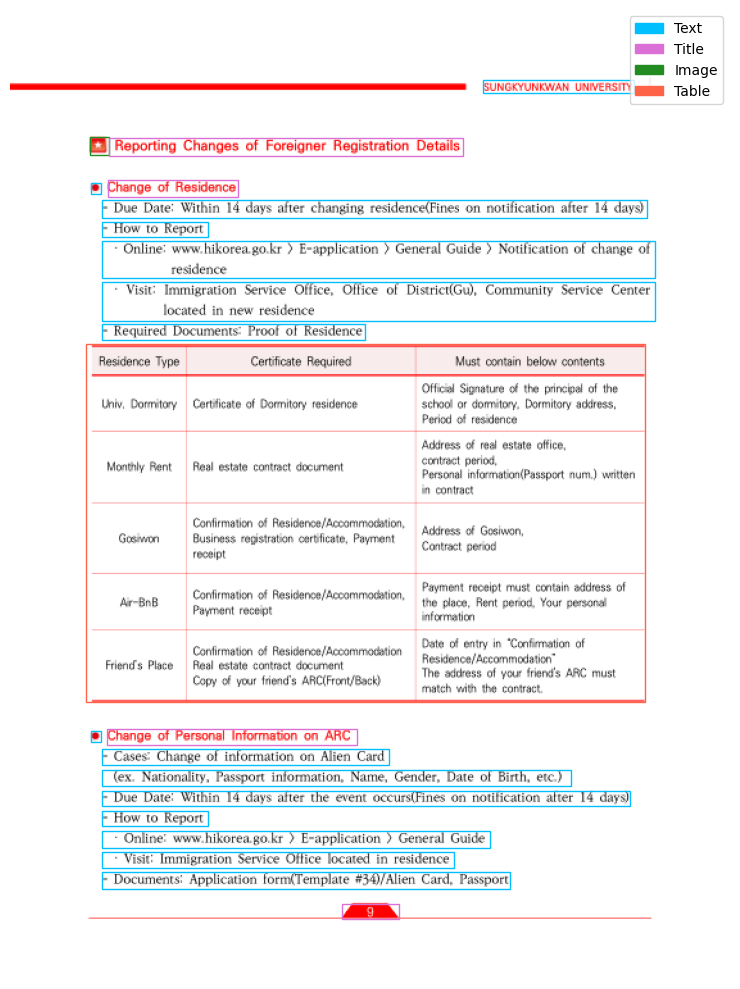

SUNGKYUNKWAN UNIVERSITY



Reporting Changes of Foreigner Registration Details

®

Change of Residence

- Due Date: Within 14 days after changing residence(Fines on notification after 14 days)

- How to Report

· Online: www.hikorea.go.kr > E-application > General Guide > Notification of change of residence

· Visit: Immigration Service Office, Office of District(Gu), Community Service Center located in new residence

- Required Documents: Proof of Residence

Residence Type Certificate Required Must contain below contents Official Signature of the principal of the Univ. Dormitory Certificate of Dormitory residence school or dormitory, Dormitory address, Period of residence Address of real estate office, Monthly Rent Real estate contract document contract period, Personal information(Passport num.) written in contract Gosiwon Confirmation of Residence/Accommodation, Business registration certificate, Payment receipt Address of Gosiwon, Contract period Air-BnB Confirmation of Residence/A

In [25]:
render_page(docs, 31)

In [125]:
from IPython.display import HTML, display

segments = [
    doc.metadata
    for doc in docs
    if doc.metadata.get("page_number") == 21 and doc.metadata.get("category") == "Table"
]

display(HTML(segments[0]["text_as_html"]))


[{'source': '../../data/pdfs\\2024 1 SKKU  international student handbook.pdf', 'coordinates': {'points': [[172.68765258789062, 340.6886901855469], [172.68765258789062, 1913.3333740234375], [1382.6524658203125, 1913.3333740234375], [1382.6524658203125, 340.6886901855469]], 'system': 'PixelSpace', 'layout_width': 1560, 'layout_height': 2103}, 'text_as_html': '<table><thead><tr><th>- Campus</th><th>e Administration Office</th><th>Y Location</th><th>W WV Academic\n (Leave of Absence, Graduation)</th><th>Major lCourses (Curriculum)</th></tr></thead><tbody><tr><td></td><td>University College/College of Education</td><td>Hoam Hall 2F</td><td>031)299-4222</td><td>02)760-0993,\n 0995</td></tr><tr><td></td><td>College of Confucian Studies&amp;Eastern \n Philosophy/College of Liberal Arts</td><td>Toegye Hall of Humanities 3F</td><td>02)760-0912</td><td>02)760-0913</td></tr><tr><td></td><td>Law School</td><td>Law School 1F</td><td>02)760-0926</td><td>02)760-0923</td></tr><tr><td></td><td>College 

In [52]:
import pandas as pd
print((HTML(segments[0]["text_as_html"])))
df = pd.read_html(segments[0]["text_as_html"])

<IPython.core.display.HTML object>


C:\Users\chlwl\AppData\Local\Temp\ipykernel_32364\4255035300.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(segments[0]["text_as_html"])


In [142]:
df[0]

,- Campus,e Administration Office,Y Location,"W WV Academic (Leave of Absence, Graduation)",Major lCourses (Curriculum)
0,NaN,University College/College of Education,Hoam Hall 2F,031)299-4222,"02)760-0993, 0995"
1,NaN,College of Confucian Studies&Eastern Philosoph...,Toegye Hall of Humanities 3F,02)760-0912,02)760-0913
2,NaN,Law School,Law School 1F,02)760-0926,02)760-0923
3,NaN,College of Social Sciences,Suseon Hall 5F,02)760-0932 02)760-0935,02)760-0932 02)760-0935
4,Humanities and Social Sciences Campus,College of Art of Economics,Business School 4F,02)760-0945,02)760-0933 02)760-0944
5,Humanities and Social Sciences Campus,College,NaN,NaN,NaN
6,Humanities and Social Sciences Campus,School of Business,Business School 4F,02)760-0943,02)760-0969
7,Humanities and Social Sciences Campus,Global Economics,International Hall 2F,02)760-0042 02)760-0040,02)760-0042 02)760-0040
8,Humanities and Social Sciences Campus,Global Business,"International Hall 2F 600""",02)760-0034,02)760-0034
9,Humanities and Social Sciences Campus,Academy of East Asian Studies,Anniversary Hall 4F,02)760-0775 02)760-0777,02)760-0775 02)760-0777


### table extract trials

In [3]:
%pip install tabula-py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB 281.8 kB/s eta 0:00:43
   - -------------------------------------- 0.5/12.0 MB 3.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/12.0 MB 8.7 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/12.0 MB 13.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.5/12.0 MB 18.5 MB/s eta 0:00:01
   ------------------------- -------------- 7.5/12.0 MB 21.9 MB/s eta 0:00:01
   -------------------------------- ------- 9.8/12.0 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------  12.0/12.0 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 38.6 MB/s eta 0:00:00


In [5]:
from tabula.io import read_pdf
df = read_pdf(pdf_files[1], pages="20")

In [6]:
df

[   대학행정실 위치 및 전화번호\r학적\r캠퍼스행정실/부서 명칭위치(건물명/층수)수업(전공)\r(휴학,졸업 등)\r02)760-0993,\r학부대학(인사캠)/사범대학호암관 2층031)299-4222\r0995\r유학대학/문과대학퇴계인문관 3층02)760-091202)760-0913\r법학전문대학원법학관 1층02)760-092602)760-0923\r사회과학대학02)760-0935\r수선관 5층02)760-0932\r예술대학02)760-0933\r경제대학경영관 4층02)760-094502)760-0944\r인문사회과학\r경영대학경영관 4층02)760-094302)760-0969\r캠퍼스\r글로벌경제학과국제관 2층02)760-004202)760-0040\r글로벌경영학과국제관 2층02)760-003402)760-0034\r동아시아학술원600주년기념관 4층02)760-077502)760-0777\rSKK GSB국제관 2층개별 프로그램에 따라 상이\r중국대학원국제관 3층02)740-1542~1544\r성균어학원(인사캠)다산경제관 3층02)760-1345(진학 안내)\r외국인유학생지원팀국제관 2층02)760-0025~0027\r02)760-0993,\r학부대학(자과캠)기초학문관 2층031)299-4222\r0995\r자연과학대학\r생명공학대학제2과학관 2층031)290-5802031)299-5803\r스포츠과학대학\r정보통신대학\r031)290-5817\r소프트웨어대학제1공학관 1층031)290-5815\r자연과학공과대학031)290-5816\r캠퍼스\r약학대학약학관 3층031)290-5875031)290-7720\r의과대학의과대학 1층031)299-6027\r성균나노과학기술원제2종합연구동 2층031)299-4115\r삼성융합의과학원삼성생명일원역 A동 9층02)2148-7798\r성균어학원(자과캠)기초학문관 3층031)290-5522(진학 안내)\r성균융합원N센터 3~4층031)290-5705\r외국인유학생지원팀학생회관 1층031)290-5025~5028\r5  \


In [83]:
%pip install Spire.Pdf


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/26.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.6 MB 653.6 kB/s eta 0:00:41
    --------------------------------------- 0.6/26.6 MB 5.9 MB/s eta 0:00:05
   - -------------------------------------- 1.2/26.6 MB 9.8 MB/s eta 0:00:03
   -- ------------------------------------- 1.4/26.6 MB 7.9 MB/s eta 0:00:04
   -- ------------------------------------- 1.5/26.6 MB 7.0 MB/s eta 0:00:04
   -- ------------------------------------- 2.0/26.6 MB 7.0 MB/s eta 0:00:04
   ----- ---------------------------------- 3.4/26.6 MB 10.5 MB/s eta 0:00:03
   -------- ------------------------------- 5.4/26.6 MB 14.4 MB/s eta 0:00:02
   ----------- ---------------------------- 7.5/26.6 MB 17.8 MB/s eta 0:00:02
   -------------- ------------------------- 9.8/26.6 MB 20.9 MB/s eta 0:00:01
   ------------------ --------------------- 12.1/26.6 MB 43.5 MB/s eta 0:00:01
   -

In [88]:
from spire.pdf.common import *
from spire.pdf import *

# Create a PdfDocument object
doc = PdfDocument()
# Load the sample PDF file
doc.LoadFromFile(pdf_files[1])

# Create a list to store the extracted data
builder = []

# Create a PdfTableExtractor object
extractor = PdfTableExtractor(doc)
print(doc.Pages.Count)
# Loop through the pages
for pageIndex in range(18,20):
    # Extract tables from a specific page
    tableList = extractor.ExtractTable(pageIndex)

    if tableList is not None and len(tableList) > 0:
        print('table!')
        # Loop through the tables in the list
        for table in tableList:
            # Get row number and column number of a certain table
            row = table.GetRowCount()
            column = table.GetColumnCount()

            # Loop through the row and column
            for i in range(row):
                for j in range(column):
                    # Get text from the specific cell
                    text = table.GetText(i, j)

                    # Add the text to the list
                    builder.append(text + " ")
                builder.append("\n")
            builder.append("\n")

148


In [86]:
builder

[]

### text extract trials

In [7]:
import fitz
import glob

file_path = '../../data/pdfs/*.pdf'
pdf_files = glob.glob(file_path)


def extract_text(pdf_file):
    doc = fitz.open(pdf_file)
    return doc

#print(extract_text(pdf_files[1]))
text = extract_text(pdf_files[1])
print(extract_text(pdf_files[1])[1].get_text())


In [25]:
import glob
from langchain_community.document_loaders import PyMuPDFLoader

file_path = '../../data/pdfs/*.pdf'
pdf_files = glob.glob(file_path)

def pdf_loader(pdf_file):
    loader = PyMuPDFLoader(pdf_file)
    pages = loader.load()
    return pages

pages = pdf_loader(pdf_files[1])

print(pages[4].page_content)

7
엘세데아
student hall 80106
☎. 010-4844-9954
insta. @
skku_lcda
Activity day undecided
	
Hello, w
e are LCDA, the central rock band club on M
yeongryun Cam
pus! W
e focus on rock 
m
usic, and w
e play a wide range of m
usic ranging from
 traditional foreign rock in the 80s and 90s to 
the m
odern indie band genre in Korea. W
e prepare regular perform
ances during the sem
ester through 
ensem
bles and study activities, and w
e also have frequent get-togethers. In addition, w
e participate in 
various school events. Anyone who wants to join us, please feel free to apply!
소리사랑
student hall 80113
☎. 010-9432-9115
insta. @
sorisarang_skku
Tue
	
Sori Sarang is the only central band club that creates m
usic! Regardless of age, departm
ent, 
and skills, m
usic lovers gather to play and create m
usic. For those who are learning m
usical instrum
ents 
for the first tim
e, w
e conduct a separate m
usical instrum
ent study, and during the vacation, w
e conduct 
a study on lyrics and songs for creati

In [40]:
from langchain_community.document_loaders import UnstructuredPDFLoader

file_path = '../../data/pdfs/*.pdf'
pdf_files = glob.glob(file_path)

def unstruc_pdf_loader(pdf_file):
    loader = UnstructuredPDFLoader(pdf_file)
    docs = loader.load()
    return docs

# 문서의 내용 출력
print(unstruc_pdf_loader(pdf_files[1])[4].page_content)


ImportError: cannot import name 'open_filename' from 'pdfminer.utils' (c:\Users\chlwl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pdfminer\utils.py)

## 3. embedding

In [136]:
import os
import warnings
from dotenv import load_dotenv

warnings.filterwarnings("ignore")
load_dotenv()


True

In [137]:
from langchain.text_splitter import CharacterTextSplitter

def get_text_chunks(text, chunk_size = 1000, chunk_overlap=200):
    text_splitter = CharacterTextSplitter(
        separator="\n",
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len
    )
    chunks = text_splitter.split_text(text)
    return chunks

In [146]:
from langchain_huggingface.embeddings import HuggingFaceEndpointEmbeddings


def embedding_doc(chunks, model_name):

    hf_embeddings = HuggingFaceEndpointEmbeddings(
        model=model_name,
        task="feature-extraction",
        huggingfacehub_api_token=os.getenv("HF_API_TOKEN"),
    )
    LIMIT = 30
    if len(chunks)>30:
       embedded_documents = []
       for i in range(0, len(chunks)+1, 30):
            embedded_doc_part = hf_embeddings.embed_documents(chunks[i:min(i+30, len(chunks))])
            embedded_documents += embedded_doc_part
    else:
        embedded_documents = hf_embeddings.embed_documents(chunks)

    return embedded_documents, hf_embeddings

### test code

In [25]:
%%time
model_name = "intfloat/multilingual-e5-large-instruct"

chunks = get_text_chunks(page_contents)
embeddings, hf_embeddings = embedding_doc(chunks, model_name)

CPU times: total: 141 ms
Wall time: 4min 57s


In [28]:
print(len(chunks))
print(len(embeddings))

139
139


In [27]:
print(f"Model: \t\t{model_name}")
print(f"Dimension: \t{len(embeddings[0])}")


Model: 		intfloat/multilingual-e5-large-instruct
Dimension: 	1024


In [29]:
embedded_query = hf_embeddings.embed_query("Where can I get shuttle bus?")

In [31]:
import numpy as np

np.array(embedded_query) @ np.array(embeddings).T


array([0.70943475, 0.6875473 , 0.70963657, 0.7101535 , 0.73235204,
       0.71340796, 0.6818014 , 0.68735594, 0.71939244, 0.7233807 ,
       0.73412925, 0.71147023, 0.72233951, 0.72122621, 0.73559821,
       0.74697492, 0.75997971, 0.73054056, 0.74139239, 0.73015891,
       0.70694091, 0.72822522, 0.71391691, 0.73167182, 0.70421771,
       0.71308977, 0.74118908, 0.70773792, 0.71035964, 0.71708909,
       0.69335378, 0.70433014, 0.7204059 , 0.72256703, 0.71318973,
       0.70675487, 0.72935004, 0.70648403, 0.70379269, 0.73195535,
       0.70820332, 0.70082033, 0.7208256 , 0.74731893, 0.73935168,
       0.73466745, 0.70137666, 0.71481924, 0.72008274, 0.70182793,
       0.74033771, 0.74777912, 0.76345429, 0.760713  , 0.78243282,
       0.75798804, 0.72296588, 0.71465209, 0.7305737 , 0.73069368,
       0.72775666, 0.72813462, 0.71848943, 0.71365003, 0.71005107,
       0.72973348, 0.73320208, 0.71687681, 0.75355373, 0.72239371,
       0.72246543, 0.72779974, 0.70493515, 0.73106329, 0.73959

In [32]:
sorted_idx = (np.array(embedded_query) @ np.array(embeddings).T).argsort()[::-1]
sorted_idx

array([ 54,  87,  52,  53, 138,  16,  55,  88,  86,  68,  75,  51, 136,
        43,  15,  83,  77,  18,  26,  50,  85,  74,  44,  79,  14,  84,
       137,  45,  10,  98,  66,   4,  81,  39,  23,  73,  59,  58,  94,
        17,  19,  65,  36,  80,  97,  21,  61,  71,  60,  82,  91,  76,
        90, 135,  78,   9,  56,  33,  70,  69,  12, 100,  13,  42,  32,
        48, 124,   8,  99, 132,  62,  29,  67, 108,  47,  57, 117,  96,
        22,  63,   5, 109,  34,  25,  11, 131,  28,  95,   3,  64, 134,
         2,   0, 118, 125, 106,  92,  40,  27, 101,  89,  20, 103,  35,
        37, 111, 128,  72, 129,  31,  24,  38, 104, 127,  93, 133,  49,
        46,  41, 121, 112, 114, 110, 113, 126, 120, 130, 102, 116,  30,
       119, 105, 123, 107,   1,   7, 115,   6, 122], dtype=int64)

In [33]:
print("[Query] Where can I get shuttle bus?\n====================================")
for i, idx in enumerate(sorted_idx):
    print(f"[{i}] {chunks[idx]}")
    print()


[Query] Where can I get shuttle bus?
[0] 19SUNGKYUNKWAN UNIVERSITY
   5) After getting off the subway, tap the transportation card again and follow the 
direction with the exit number
- Etiquette
  · Avoid to getting the pink seat: the seat is for a pregnant
  · Get on the subway car after others get off
  · Line up to the right side of an escalator
  · Be quiet in subway
Bus
- Buses are the easiest way to get from Seoul to another cities.
- Method
   1) The nearest Bus station: Use map application like Naver map and Kakao Map. 
   2) Check the bus which you have to take: consider number and color of the bus
        [Red: Express]           [Blue: Mainline]               [Green: Branch]
19   3) 탑승 후, 교통카드 태그하기
   4) 버스 안의 모니터 및 안내방송을 통해서 현재 위치 확인하기
   5) 내리기 전에 목적지가 가까워지면 벨 누르기
   6) 하차 전, 교통카드 태그하기. 태그하지 않을 시, 추가비용이 지불될 가능성이 있음.
20SUNGKYUNKWAN UNIVERSITY
   3) Tap the transportation card after getting in the bus
   4) Find your current location via monitor on the bus and announcement


### using open ai (cost money)

In [41]:
from dotenv import load_dotenv
import os
import tiktoken
import openai

# .env file
load_dotenv()

# ref: https://medium.com/@alexrodriguesj/building-a-vector-store-from-pdfs-documents-using-pinecone-and-langchain-a5c991b2a888
class EmbeddingGenerator:
    def __init__(self):
        # Load API key from environment variables
        openai_api_key = os.getenv("OPENAI_API_KEY")
        if not openai_api_key:
            raise ValueError("OPENAI_API_KEY environment variable not set")

    def chunk_text_by_tokens(self, text, chunk_size, encoding_name="cl100k_base"):
        """
        Splits the text into chunks based on the number of tokens.
        """
        encoding = tiktoken.get_encoding(encoding_name)
        tokens = encoding.encode(text)
        return [encoding.decode(tokens[i:i + chunk_size]) for i in range(0, len(tokens), chunk_size)]

    def generate_embeddings(self, chunks):
        """
        Generates embeddings for each chunk and returns a list of embeddings.
        """
        embeddings = []
        for chunk in chunks:
            response = openai.embeddings.create(
                input=chunk,
                model="text-embedding-ada-002"
            )
            embeddings.append(response.data[0].embedding)
        return embeddings

    # TODO: find appropriate chunk_size
    def process_text(self, text, chunk_size=1000):
        """
        Splits the text it into chunks, and generates the embeddings.
        """
        chunks = self.chunk_text_by_tokens(text, chunk_size)
        embeddings = self.generate_embeddings(chunks)
        return chunks, embeddings

In [52]:
emb_gen = EmbeddingGenerator()
chunks, embeddings = emb_gen.process_text(pages[4].page_content, chunk_size=800)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

## 4. Store in Pinecone

In [139]:
from pinecone import *
load_dotenv()  # Load environment variables from .env file

class PineconeStore:
    def __init__(self):
        # Load API key from environment variables
        pinecone_api_key = os.getenv("PINECONE_API_KEY")
        if not pinecone_api_key:
            raise ValueError("PINECONE_API_KEY environment variable not set")

        # Create a Pinecone instance
        self.pc = Pinecone(api_key=pinecone_api_key)

        # Define the index name
        self.index_name = "iskku-data"

        # Check if the index exists, if not create it
        if self.index_name not in self.pc.list_indexes().names():
            self.pc.create_index(
                name=self.index_name,
                dimension=1024,
                metric='cosine',
                spec=ServerlessSpec(cloud='aws', region='us-east-1')
            )

    def save_vectors(self, vectors, metadata, chunks):
        # Get the index
        index = self.pc.Index(self.index_name)

        # Iterate over the embeddings and save each one with unique metadata
        for i, vector in enumerate(vectors):
            vector_id = f"{os.path.basename(meta_data['source'])}chunk_{i}"  # Unique ID for each chunk
            chunk_metadata = {
                "id": vector_id,
                "source": metadata["source"],
                "chunk": i,
                "text": chunks[i]  # Add the text of the chunk here
            }
            # Upsert each vector with its corresponding metadata
            index.upsert(
                vectors=[(vector_id, vector, chunk_metadata)],
                namespace=os.path.basename(meta_data['source']))

## 5. PDF data preprocessing

In [150]:
for pdf in pdf_files:
    # text extraction
    meta_data = pdf_metadata_loader(pdf)
    text, kortable = extract_text_and_kortables(pdf)
    engtable = extract_engtables(pdf)

    # make embeddings
    text_chunks = get_text_chunks(page_contents)
    chunks = text_chunks + kortable + engtable
    embeddings, hf_embeddings = embedding_doc(chunks, model_name = "intfloat/multilingual-e5-large-instruct")

    # save in pinecone
    vector_store = PineconeStore()
    vector_store.save_vectors(embeddings, meta_data, chunks)

    

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Allow failed set to 0
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 44 (44 total)
INFO: Determined optimal split size of 9 pages.
INFO: Partitioning 4 files with 9 page(s) each.
INFO: Partitioning 1 file with 8 page(s).
INFO: Partitioning set #1 (pages 1-9).
INFO: Partitioning set #2 (pages 10-18).
INFO: Partitioning set #3 (pages 19-27).
INFO: Partitioning set #4 (pages 28-36).
INFO: Partitioning set #5 (pages 37-44).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: S